In [2]:
import pygad
import numpy as np
import time

In [7]:
n = 8

def createBoard(n: int) -> list[list[int]]:
    return np.zeros((n, n), dtype=int)

boardToShow = createBoard(n)
print("Board:\n", boardToShow)

Board:
 [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [6]:
def fulfillBoard(solution: list[int]) -> list[list[int]]:
    board = createBoard(n)
    
    for i in range(len(solution)):
        x = solution[i]
        board[i][x] = 1

    return board

def checkColission(row: int, col: int, board: list[list[int]]) -> bool:
    n = len(board)
    
    # Check row and column
    if sum(board[row]) > 1 or sum([board[i][col] for i in range(n)]) > 1:
        return True
    
    # Check diagonal
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1 and (i, j) != (row, col):
            return True
    for i, j in zip(range(row, n), range(col, -1, -1)):
        if board[i][j] == 1 and (i, j) != (row, col):
            return True
    
    return False

def fitness_func(solution, solution_idx):
    newSol = solution.astype(int)
    attacks = 0
    board = fulfillBoard(newSol)

    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 1:
                if checkColission(i, j, board):
                    attacks += 1
                    
    board = createBoard(n)
    return (attacks * -1)

fitness_function = fitness_func

In [11]:
def printResult(solution, solution_fitness):
    print("Parameters of the best solution : {solution}".format(solution=solution.astype(int)))
    print("Fitness value of the best solution = {solution_fitness}".format(
        solution_fitness=solution_fitness))

def printAverages(times, generations, solved):
    average_time = 0
    for time in times:
        average_time += time
    average_time = average_time / len(times)
    print("Average time (sec): ", average_time)

    average_gen = 0
    for gen in generations:
        average_gen += gen
    average_gen = average_gen / len(generations)
    print("Average number of generations ", average_gen)

    print(f"GA solved {solved}/100")


def ga_instance_generate(n): 
    #sss=steady, rws=roulette, rank, tournament
    parent_selection_type = "sss"
    crossover_type = "single_point"
    mutation_type = "random"
    mutation_percent_genes = 8
    gene_space = np.arange(n)
    sol_per_pop = 450
    num_genes = n
    num_parents_mating = 150
    num_generations = 400
    keep_parents = 60
    return pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=["reach_0", "saturate_200"])

Parameters of the best solution : [0]
Fitness value of the best solution = 0


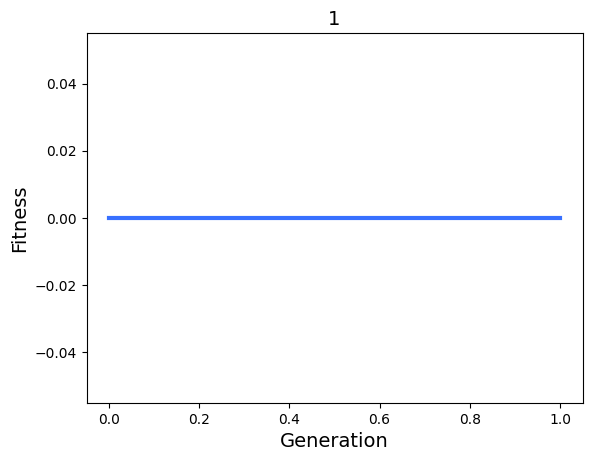

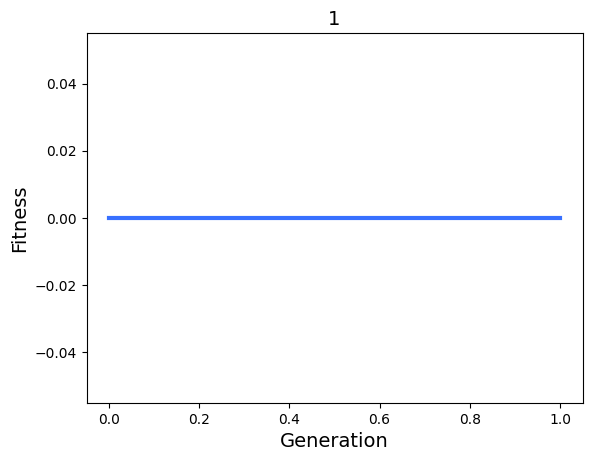

In [12]:
n = 1

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness(n)

Parameters of the best solution : [0 1]
Fitness value of the best solution = -1


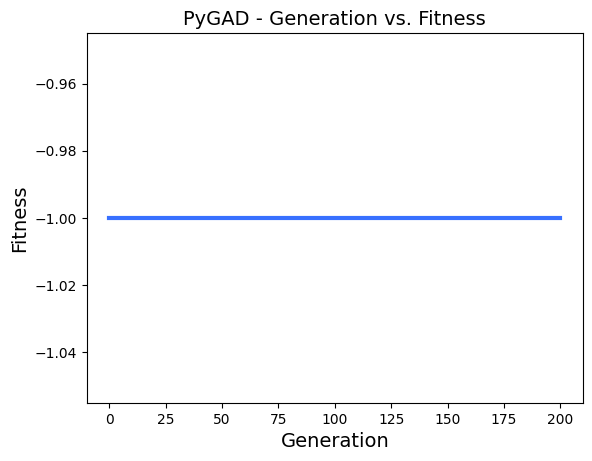

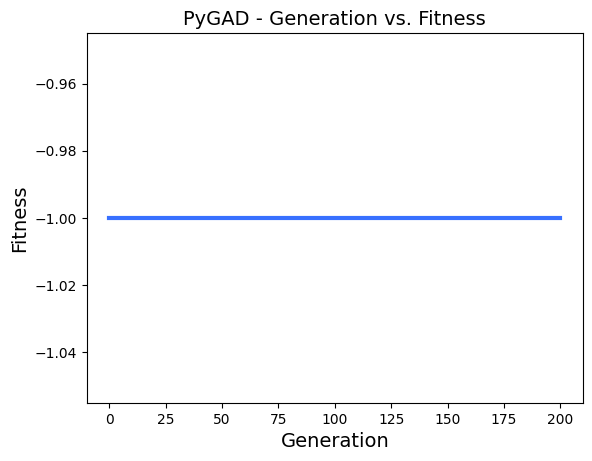

In [13]:
n = 2

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution.astype(int)))
print("Fitness value of the best solution = {solution_fitness}".format(
    solution_fitness=solution_fitness))

ga_instance.plot_fitness()

Parameters of the best solution : [2 4 1 3 0]
Fitness value of the best solution = 0


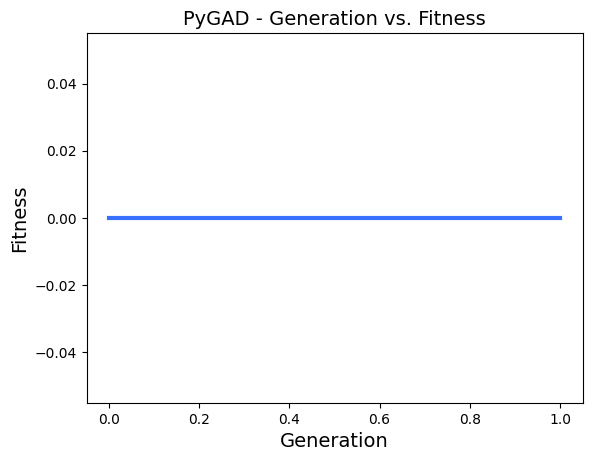

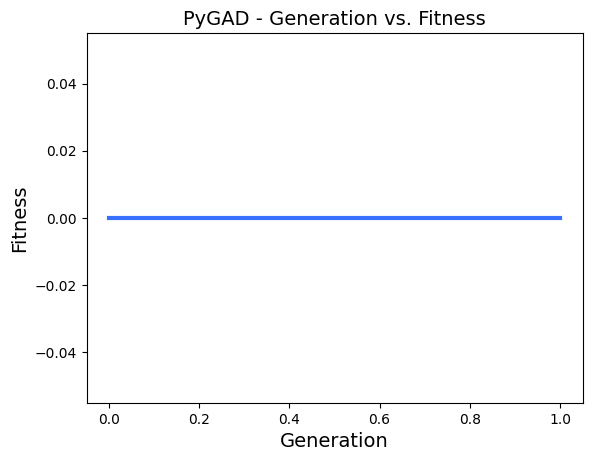

In [14]:
n = 5

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

Parameters of the best solution : [6 0 2 7 5 3 1 4]
Fitness value of the best solution = 0


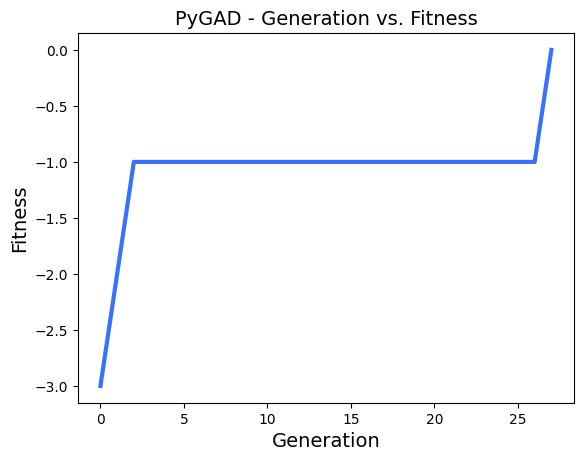

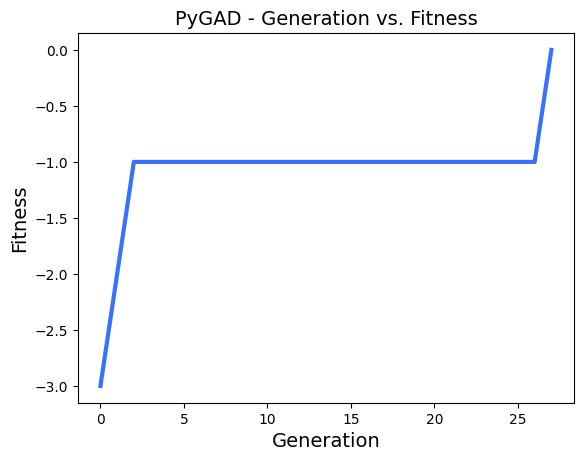

In [15]:
n = 8

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

Parameters of the best solution : [ 3 10  8  1 11  7  2  0  5  9  4  6]
Fitness value of the best solution = 0


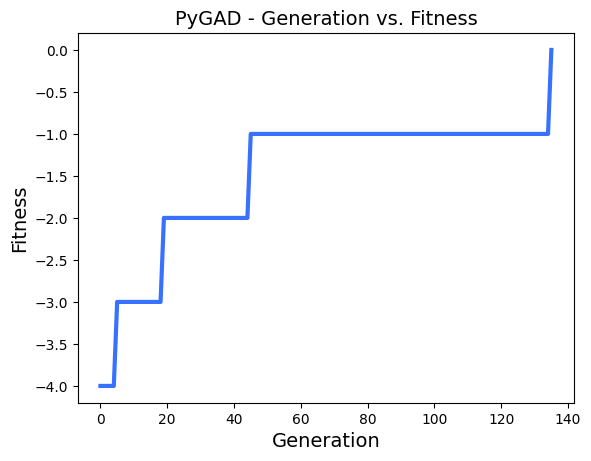

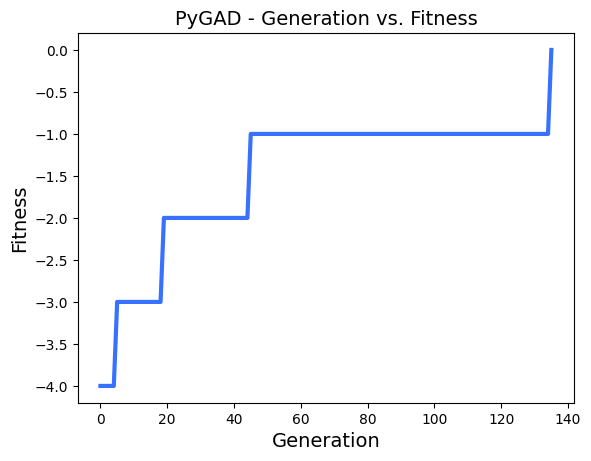

In [206]:
n = 12

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

Parameters of the best solution : [ 4  2 11  9  1  5  8 12  7  0 13  6 10  3]
Fitness value of the best solution = 0


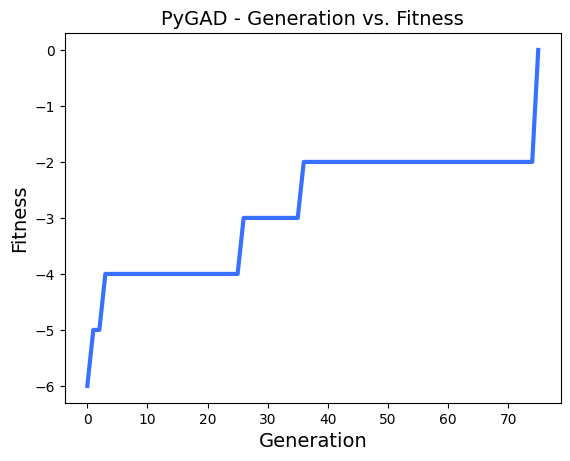

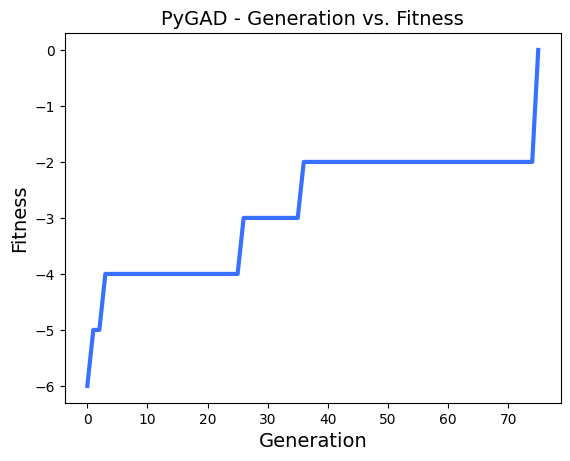

In [203]:
n = 14

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

Parameters of the best solution : [10 13  6  1 11  7  3  0 16  9 15 12  8  4 17 14  5  2]
Fitness value of the best solution = 0


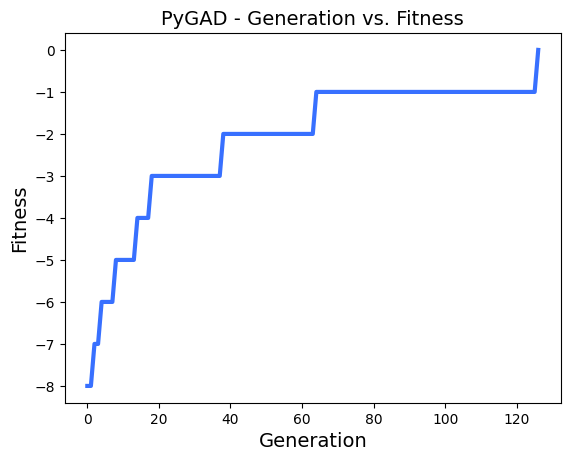

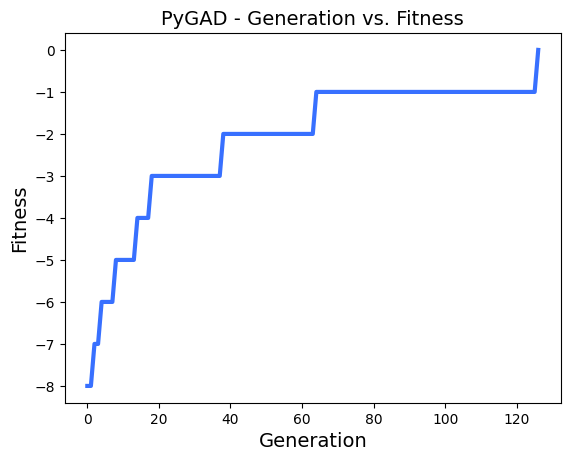

In [178]:
n = 18

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

Parameters of the best solution : [ 0 18 12  5  9 11 19  2  4 13 17 10  3  7 15  8 14  1  6 16]
Fitness value of the best solution = 0


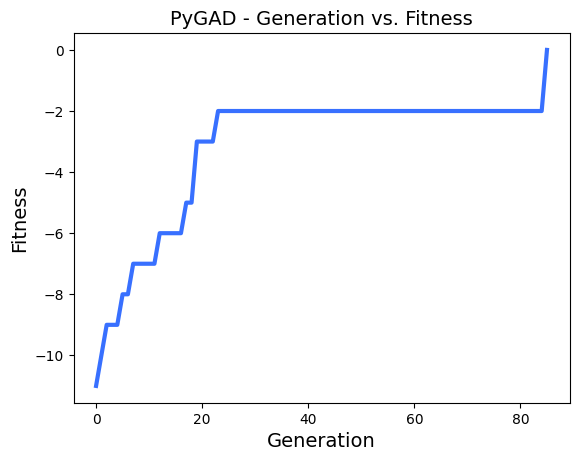

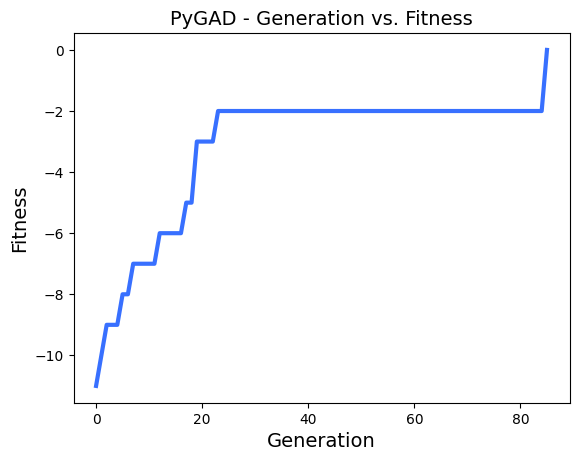

In [135]:
n = 20

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

Parameters of the best solution : [13 16  0 12  7 17  6 11  1 14  4 18  9  3 20 10 15 19  2  5  8]
Fitness value of the best solution = 0


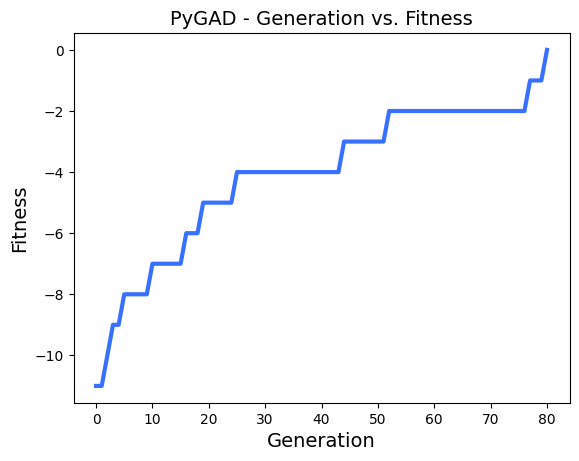

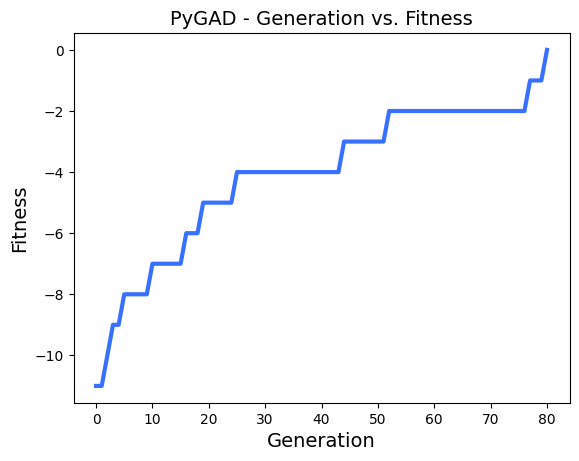

In [173]:
n = 21

ga_instance = ga_instance_generate(n)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
printResult(solution, solution_fitness)

ga_instance.plot_fitness()

In [16]:
n = 5

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    ga_instance = ga_instance_generate(n)
    
    ga_instance.run()
    end = time.time()
    times.append(end - start)
    generations.append(ga_instance.generations_completed)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        solved += 1
    
printAverages(times, generations, solved)

Average time (sec):  0.06435400247573853
Average number of generations  1.04
GA solved 100/100


In [207]:
n = 10

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    ga_instance = ga_instance_generate(n)
    
    ga_instance.run()
    end = time.time()
    times.append(end - start)
    generations.append(ga_instance.generations_completed)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        solved += 1
    
printAverages(times, generations, solved)

Average time (sec):  7.108049712181091
Average number of generations  101.08
GA solved 86/100


In [208]:
n = 16

times = []
generations = []
solved = 0
for i in range(100):
    start = time.time()
    ga_instance = ga_instance_generate(n)
    
    ga_instance.run()
    end = time.time()
    times.append(end - start)
    generations.append(ga_instance.generations_completed)
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    if solution_fitness == 0:
        solved += 1
    
printAverages(times, generations, solved)

Average time (sec):  28.87527069091797
Average number of generations  188.19
GA solved 53/100
